Training model with relu activation
Training model with sigmoid activation
Training model with tanh activation
Training model with softmax activation
Training model with linear activation
Training model with elu activation
Training model with swish activation


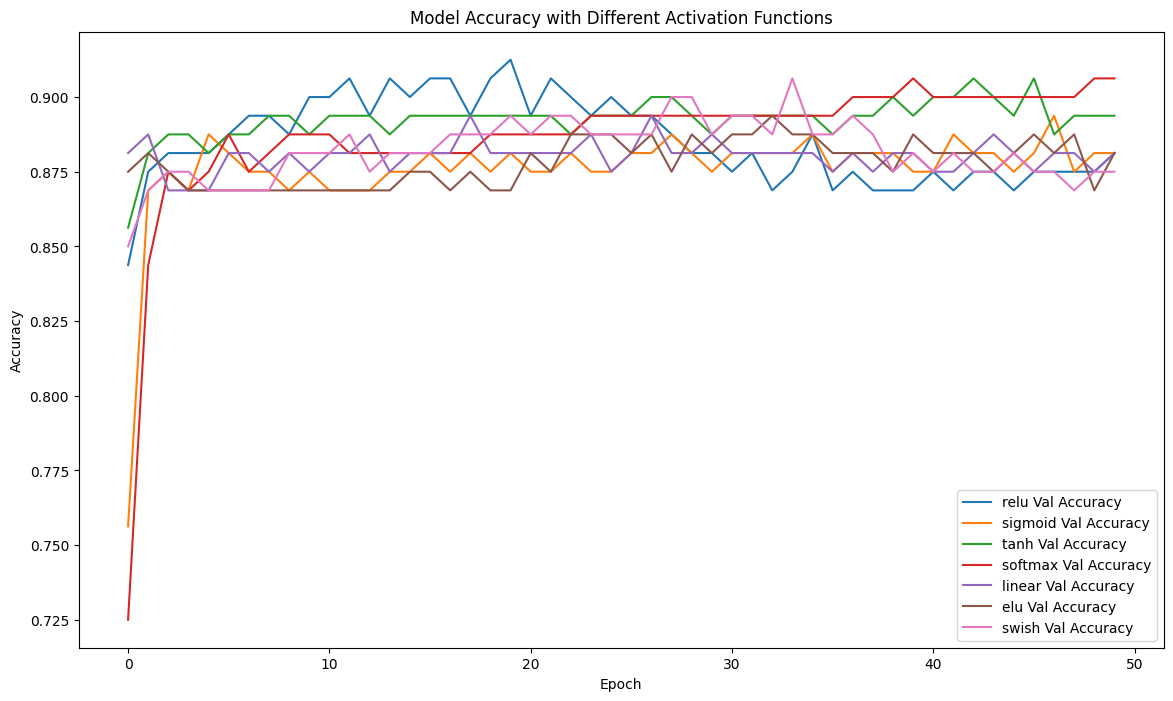

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras import layers
from keras import models

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def build_model(activation_function):
    model = models.Sequential([layers.InputLayer(shape=(20, )), layers.Dense(64, activation=activation_function), layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


activations = ['relu', 'sigmoid', 'tanh', 'softmax', 'linear', 'elu', 'swish']
history_dict = {}
for act in activations:
    model = build_model(act)
    print(f"Training model with {act} activation")
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0, validation_split=0.2)
    history_dict[act] = history
plt.figure(figsize=(14, 8))
for act in activations:
    plt.plot(history_dict[act].history['val_accuracy'], label=f'{act} Val Accuracy')
plt.title('Model Accuracy with Different Activation Functions')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()